In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [7]:
ds = xr.open_dataset('C:Temp/data/srms_dc.nc', chunks={'filename':1})
ds = ds.swap_dims({'band':'wavelength'})
ds

<xarray.Dataset>
Dimensions:            (filename: 4, wavelength: 128, x: 520, y: 696)
Coordinates:
    band               (wavelength) int32 1 2 3 4 5 6 ... 124 125 126 127 128
  * y                  (y) float64 0.5 1.5 2.5 3.5 ... 692.5 693.5 694.5 695.5
  * x                  (x) float64 0.5 1.5 2.5 3.5 ... 516.5 517.5 518.5 519.5
  * wavelength         (wavelength) float64 372.5 377.5 ... 1.038e+03 1.044e+03
  * filename           (filename) object '_I29_L0-511_12-12-2018_11.29.27_PTFE' ... '_I29_L0-511_12-12-2018_11.41.23_dark'
Data variables:
    dark_corrected_dn  (filename, wavelength, y, x) uint16 dask.array<shape=(4, 128, 696, 520), chunksize=(1, 128, 696, 520)>

In [55]:
ds['reference'] = ds.isel(filename=0)['dark_corrected_dn']
ds['reference']

<xarray.DataArray 'reference' (wavelength: 128, y: 696, x: 520)>
dask.array<shape=(128, 696, 520), dtype=uint16, chunksize=(128, 696, 520)>
Coordinates:
    band        (wavelength) int32 1 2 3 4 5 6 7 ... 122 123 124 125 126 127 128
  * y           (y) float64 0.5 1.5 2.5 3.5 4.5 ... 692.5 693.5 694.5 695.5
  * x           (x) float64 0.5 1.5 2.5 3.5 4.5 ... 516.5 517.5 518.5 519.5
  * wavelength  (wavelength) float64 372.5 377.5 382.5 ... 1.038e+03 1.044e+03

In [56]:
ds['reflectance'] = ds['dark_corrected_dn'] / ds['reference']

In [57]:
plt.imshow?

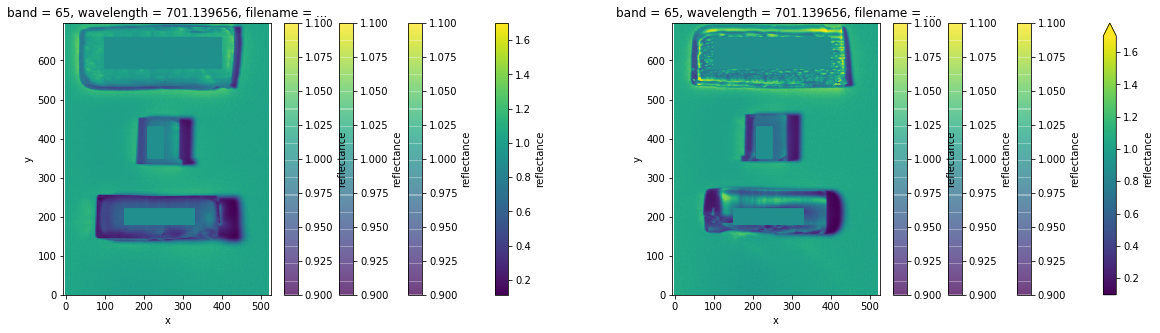

In [58]:
green_roi = {'x': slice(100, 400), 'y': slice(580, 660)}
orange_roi = {'x': slice(210, 250), 'y': slice(350, 430)}
red_roi = {'x': slice(150, 330), 'y': slice(180, 220)}

fig, ax = plt.subplots(ncols=2, figsize=(20,5))
for k, file in enumerate([1,2]):
    ds['reflectance'].isel(filename=file, wavelength=64).plot(ax=ax[k], vmax=1.7)
    for roi in [green_roi, orange_roi, red_roi]:
        xr.ones_like(ds['reflectance'].isel(filename=file, wavelength=64, **roi)).plot(ax=ax[k], alpha=0.5)
    ax[k].axis('equal')


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
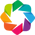

In [84]:
import holoviews as hv
hv.extension('bokeh')
from slicing_tools import slicer, spectra

In [59]:
slicer(hv.Dataset(ds), 'reflectance')

:Layout
   .DynamicMap.I  :DynamicMap   [wavelength,filename]
      :Image   [x,y]   (dark_corrected_dn)
   .DynamicMap.II :DynamicMap   [y,x,filename]
      :Curve   [wavelength]   (dark_corrected_dn,reflectance,reference)

In [108]:
from radiometry import linear_regression
fits = [linear_regression(ds.isel(filename=1, **roi), 'reference', 'dark_corrected_dn', 'wavelength')
        for roi in [green_roi, orange_roi, red_roi]]

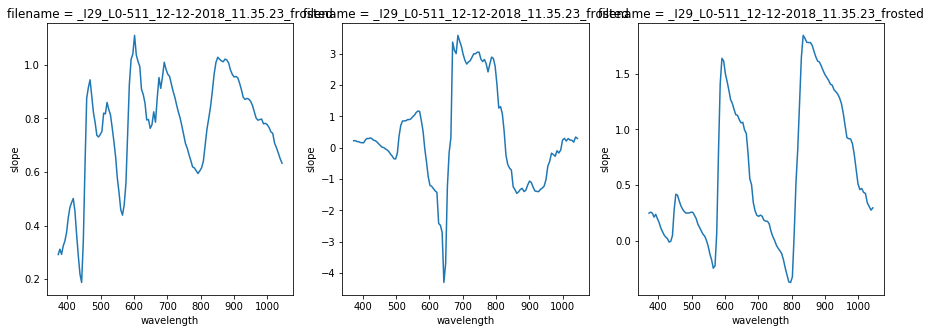

In [116]:
fig, ax= plt.subplots(ncols=3, figsize=(15,5))
for k,f in enumerate(fits):
    f.slope.plot(ax=ax[k])
plt.show()

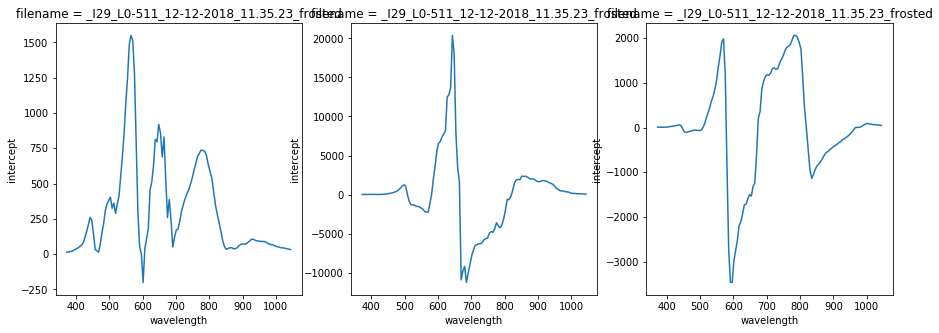

In [117]:
fig, ax= plt.subplots(ncols=3, figsize=(15,5))
for k, f in enumerate(fits):
    f.intercept.plot(ax=ax[k])
plt.show()


In [133]:
%%output size=150
from radiometry import PTFE_reflectance_factor_45_0


def R_plot(wavelength, roi):
    rfac = PTFE_reflectance_factor_45_0().interp_like(fits[roi].wavelength, kwargs={'fill_value': 'extrapolate'})
    x = (fits[roi].sel(wavelength=wavelength)['reference'] * rfac.sel(wavelength=wavelength)).data.ravel()
    y = fits[roi].sel(wavelength=wavelength)['dark_corrected_dn'].data.ravel()
    slope = float(fits[roi]['slope'].sel(wavelength=wavelength).data)
    intercept = float(fits[roi]['intercept'].sel(wavelength=wavelength).data)
    R, resid, _, _ = np.linalg.lstsq(x.reshape(x.size, 1), y.reshape(y.size, 1), rcond=None)
    scatter = hv.Scatter(np.stack([x,y], axis=-1))
    line = hv.Curve([[0, 0],[4096, R * 4096]],  label=f'R={np.round(float(R), decimals=2)}, res/N_px={int(resid)/len(x)}').options({'Curve':{'color':'black'}})
    fit_line = hv.Curve([[0, intercept],[4096, slope * 4096 + intercept]],  label=f'slope={np.round(slope, decimals=2)}, intercept/max(DN)={np.round(intercept/y.max(), decimals=2)}').options({'Curve':{'color':'red'}})
    return scatter * line * fit_line

dmap = hv.DynamicMap(
    R_plot, kdims=['wavelength', 'roi'],
).redim.values(
    wavelength=ds.wavelength.data,
    roi=[0,1,2],
).redim(
    x=hv.Dimension('ref', label='Reference DN', range=(0, 4096)),
    y=hv.Dimension('dn', label='Sample DN', range=(0, 4096))
)
dmap

:DynamicMap   [wavelength,roi]
   :Overlay
      .Scatter.I                                                                                                              :Scatter   [ref]   (dn)
      .Curve.R_equals_0_full_stop_97_comma_res_over_N_px_equals_12_full_stop_338458333333334                                  :Curve   [ref]   (dn)
      .Curve.Slope_equals_0_full_stop_29_comma_intercept_over_max_left_parenthesis_DN_right_parenthesis_equals_0_full_stop_45 :Curve   [ref]   (dn)

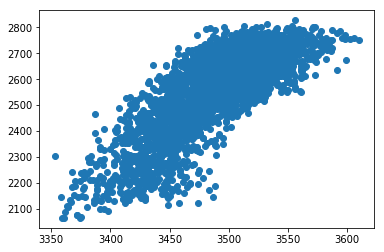

In [124]:
plt.scatter(ds.isel(**orange_roi, wavelength=64)['reference'], ds.isel(filename=1,wavelength=64, **orange_roi)['dark_corrected_dn'])

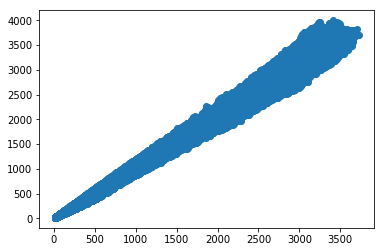

In [121]:
plt.scatter(ds.isel(**green_roi)['reference'], ds.isel(filename=1, **green_roi)['dark_corrected_dn'])

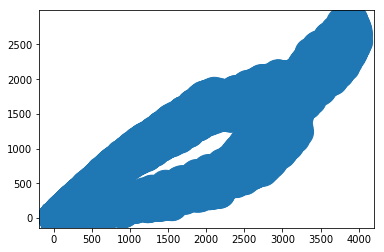

In [125]:
plt.scatter(ds.isel(**red_roi)['reference'], ds.isel(filename=1, **red_roi)['dark_corrected_dn'], ds.wavelength)